In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#df = pd.read_csv("fcc-forum-pageviews.csv")
#df['date'] = pd.to_datetime(df['date'])
#df.set_index('date', inplace=True)

# Equivalente à #
df = pd.read_csv(
    'fcc-forum-pageviews.csv',
    index_col=0,
    parse_dates=True
)


In [2]:
df = df[ (df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975)) ]


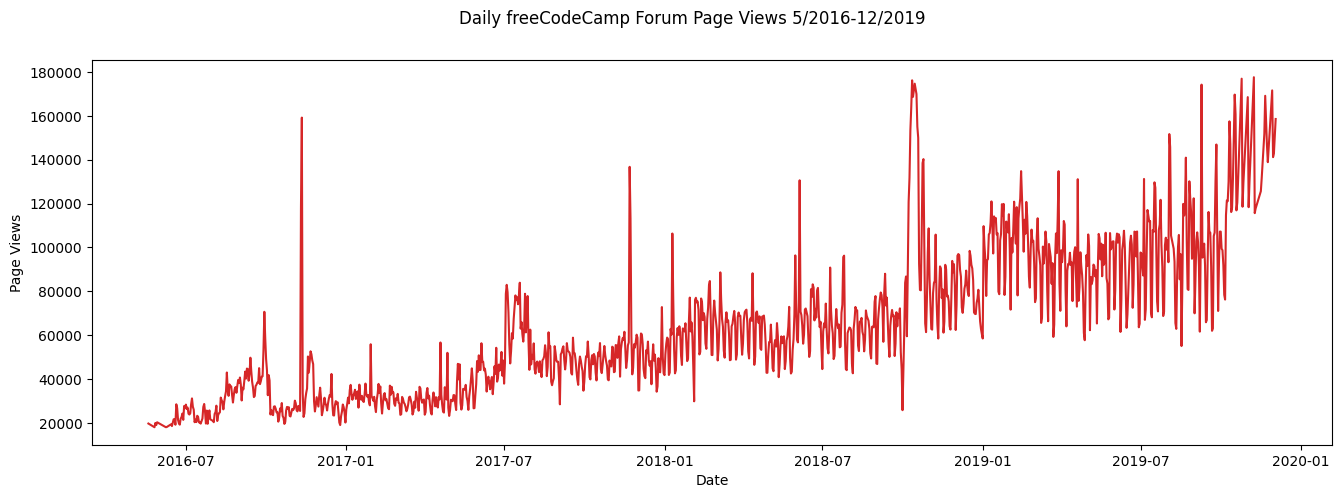

In [8]:
fig, ax = plt.subplots(figsize=(16, 5))
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')#fig.suptitle('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set(xlabel='Date', ylabel='Page Views')
ax.plot(df, 'tab:red') # plt.plot(df.index, df['value'], 'tab:red') #ax.plot(df)
fig.savefig('teste_0001.png')

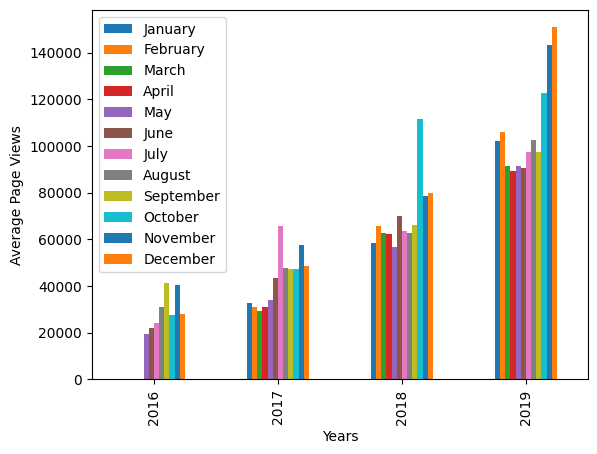

In [6]:
fig, axs = plt.subplots()

df.groupby([(df.index.year), (df.index.month)]).mean().unstack().plot(
    kind='bar', ax=axs
)
axs.legend(["January", "February","March",
            "April","May","June",
            "July","August","September",
            "October","November","December"]);
axs.set(xlabel='Years', ylabel='Average Page Views')
#xlabel='Years',ylabel='Average Page Views'
fig.savefig('teste_0002.png')

In [10]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


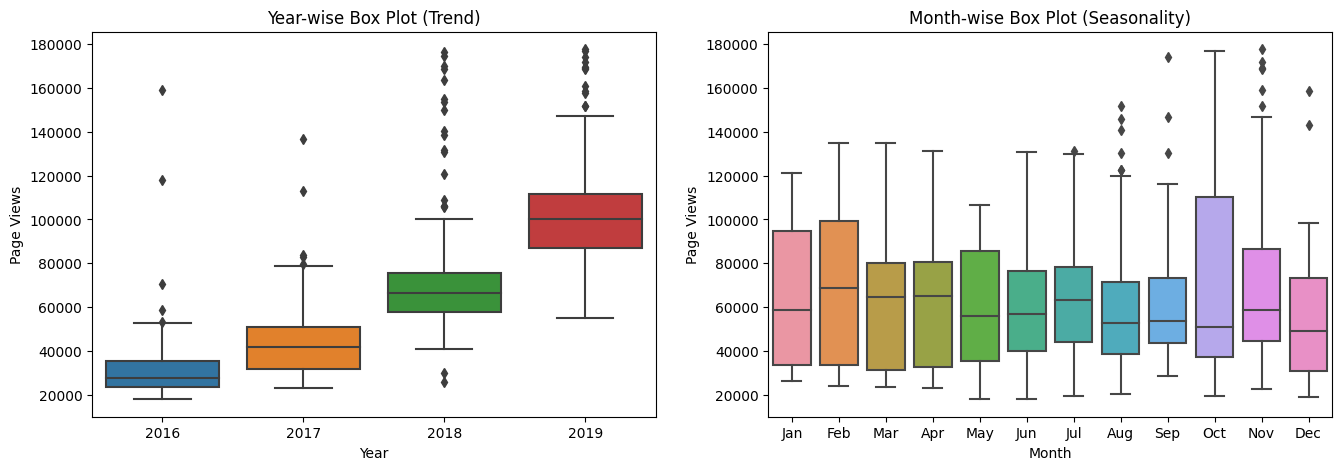

In [11]:
fig, axes = plt.subplots(1, 2,figsize=(16, 5))
sns.boxplot(data=df_box,x='year',y='value',ax = axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set(xlabel='Year', ylabel='Page Views')
b = ['Jan','Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(data=df_box,x='month',y='value',order = b)
axes[1].set(xlabel='Month', ylabel='Page Views')
axes[1].set_title('Month-wise Box Plot (Seasonality)')
fig.savefig('teste_0003.png')